# CIS 4526 Sp23 HomeWork 4

### Classifying weather by taking a picture 

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from keras.models import Model

In [4]:
cloud_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'cloudy' in i]
rain_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'rain' in i]
sunrise_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'sunrise' in i]
sunshine_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'shine' in i]

In [5]:
cloud_set

['data/weather_data/cloudy1.jpg',
 'data/weather_data/cloudy10.jpg',
 'data/weather_data/cloudy100.jpg',
 'data/weather_data/cloudy101.jpg',
 'data/weather_data/cloudy102.jpg',
 'data/weather_data/cloudy103.jpg',
 'data/weather_data/cloudy104.jpg',
 'data/weather_data/cloudy105.jpg',
 'data/weather_data/cloudy106.jpg',
 'data/weather_data/cloudy107.jpg',
 'data/weather_data/cloudy108.jpg',
 'data/weather_data/cloudy109.jpg',
 'data/weather_data/cloudy11.jpg',
 'data/weather_data/cloudy110.jpg',
 'data/weather_data/cloudy111.jpg',
 'data/weather_data/cloudy112.jpg',
 'data/weather_data/cloudy113.jpg',
 'data/weather_data/cloudy114.jpg',
 'data/weather_data/cloudy115.jpg',
 'data/weather_data/cloudy116.jpg',
 'data/weather_data/cloudy117.jpg',
 'data/weather_data/cloudy118.jpg',
 'data/weather_data/cloudy119.jpg',
 'data/weather_data/cloudy12.jpg',
 'data/weather_data/cloudy120.jpg',
 'data/weather_data/cloudy121.jpg',
 'data/weather_data/cloudy122.jpg',
 'data/weather_data/cloudy123.jpg

In [6]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [7]:
cloud_set

['data/weather_data/cloudy69.jpg',
 'data/weather_data/cloudy148.jpg',
 'data/weather_data/cloudy274.jpg',
 'data/weather_data/cloudy237.jpg',
 'data/weather_data/cloudy249.jpg',
 'data/weather_data/cloudy73.jpg',
 'data/weather_data/cloudy15.jpg',
 'data/weather_data/cloudy214.jpg',
 'data/weather_data/cloudy271.jpg',
 'data/weather_data/cloudy243.jpg',
 'data/weather_data/cloudy44.jpg',
 'data/weather_data/cloudy32.jpg',
 'data/weather_data/cloudy138.jpg',
 'data/weather_data/cloudy31.jpg',
 'data/weather_data/cloudy200.jpg',
 'data/weather_data/cloudy94.jpg',
 'data/weather_data/cloudy87.jpg',
 'data/weather_data/cloudy204.jpg',
 'data/weather_data/cloudy254.jpg',
 'data/weather_data/cloudy140.jpg',
 'data/weather_data/cloudy284.jpg',
 'data/weather_data/cloudy169.jpg',
 'data/weather_data/cloudy123.jpg',
 'data/weather_data/cloudy72.jpg',
 'data/weather_data/cloudy27.jpg',
 'data/weather_data/cloudy109.jpg',
 'data/weather_data/cloudy66.jpg',
 'data/weather_data/cloudy149.jpg',
 'd

In [8]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[:150] + sunshine_set[:150]

In [9]:
train_set

['data/weather_data/cloudy69.jpg',
 'data/weather_data/cloudy148.jpg',
 'data/weather_data/cloudy274.jpg',
 'data/weather_data/cloudy237.jpg',
 'data/weather_data/cloudy249.jpg',
 'data/weather_data/cloudy73.jpg',
 'data/weather_data/cloudy15.jpg',
 'data/weather_data/cloudy214.jpg',
 'data/weather_data/cloudy271.jpg',
 'data/weather_data/cloudy243.jpg',
 'data/weather_data/cloudy44.jpg',
 'data/weather_data/cloudy32.jpg',
 'data/weather_data/cloudy138.jpg',
 'data/weather_data/cloudy31.jpg',
 'data/weather_data/cloudy200.jpg',
 'data/weather_data/cloudy94.jpg',
 'data/weather_data/cloudy87.jpg',
 'data/weather_data/cloudy204.jpg',
 'data/weather_data/cloudy254.jpg',
 'data/weather_data/cloudy140.jpg',
 'data/weather_data/cloudy284.jpg',
 'data/weather_data/cloudy169.jpg',
 'data/weather_data/cloudy123.jpg',
 'data/weather_data/cloudy72.jpg',
 'data/weather_data/cloudy27.jpg',
 'data/weather_data/cloudy109.jpg',
 'data/weather_data/cloudy66.jpg',
 'data/weather_data/cloudy149.jpg',
 'd

In [10]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

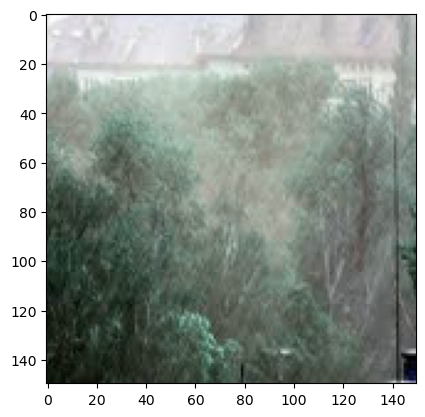

In [11]:
# Display some images
idx = 200
#image = train_set[idx]
image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [17]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

In [18]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

1


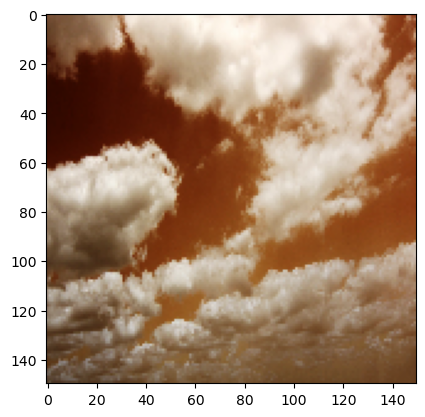

In [16]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

In [31]:
# define a small convent
inputs = Input(shape=(150, 150, 3))

x = inputs

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# 13.) Model Summary
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 32)        9248

In [32]:
# 14.) Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
19/19 [==============================] - 5s 236ms/step - loss: 9.1812 - accuracy: 0.5008 - val_loss: 1.1170 - val_accuracy: 0.5283
Epoch 2/10
19/19 [==============================] - 4s 229ms/step - loss: 0.8158 - accuracy: 0.6661 - val_loss: 0.6695 - val_accuracy: 0.7700
Epoch 3/10
19/19 [==============================] - 4s 234ms/step - loss: 0.5265 - accuracy: 0.8130 - val_loss: 0.6102 - val_accuracy: 0.7505
Epoch 4/10
19/19 [==============================] - 5s 244ms/step - loss: 0.4220 - accuracy: 0.8397 - val_loss: 0.4029 - val_accuracy: 0.8480
Epoch 5/10
19/19 [==============================] - 5s 243ms/step - loss: 0.4559 - accuracy: 0.8431 - val_loss: 0.7055 - val_accuracy: 0.7427
Epoch 6/10
19/19 [==============================] - 5s 254ms/step - loss: 0.4746 - accuracy: 0.8080 - val_loss: 0.3906 - val_accuracy: 0.8733
Epoch 7/10
19/19 [==============================] - 5s 243ms/step - loss: 0.2914 - accuracy: 0.8748 - val_loss: 0.3432 - val_accuracy: 0.8791
Epoch 

### Plot learning Curves

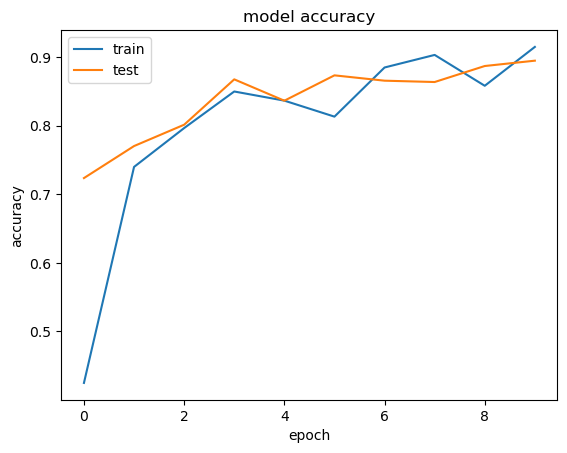

In [83]:
# 15.) Plot Accuracy Over Training Period
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

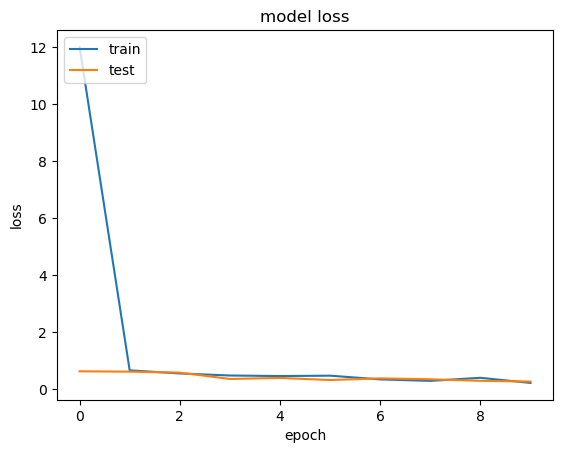

In [80]:
# summarize history for los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating the model out-of-sample

In [84]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 2s 88ms/step - loss: 0.2766 - accuracy: 0.8949
Test accuracy: 0.895
